# Part II - Impact of Fan Presence at Stadiums on Home Team Results
## by (Yaw Poku Gyabaah)


## Investigation Overview


> This data set explores whether the abscence of fans from stadiums during the covid period had any impact on match results for english premier league matches played during the 2019/2020 and 2020/2021 seasons.



## Dataset Overview

> The dataset contains data on 760 english premier league matches played during the 2019/2020 and 2020/2021 seasons. There is data on match result, goals scored by home team at half time and at full time, goals scored by away team at half time and at full time, goals scored by half time and goals scored at fulltime. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
epl_2019_20=pd.read_csv(r'C:\Users\gyabaah.poku\OneDrive - Vodafone Group\VDF Project\PY\Udacity Data Science\English Premier League Database\2019-20.csv')
epl_2020_21=pd.read_csv(r'C:\Users\gyabaah.poku\OneDrive - Vodafone Group\VDF Project\PY\Udacity Data Science\English Premier League Database\2020-21.csv')
epl_2019_20.loc[:, 'season'] = '19_20'
epl_2020_21.loc[:, 'season'] = '20_21'
epl_data = pd.concat([epl_2019_20,epl_2020_21])



In [4]:
epl_data.loc[:, 'TG'] = epl_data.FTHG + epl_data.FTAG
epl_data.loc[:, 'THTG'] = epl_data.HTHG + epl_data.HTAG
epl_data.loc[:, 'SHG'] = epl_data.TG - epl_data.THTG


In [5]:
matches_with_fans = epl_data[epl_data['Attendance']=='Fans']['FTR'].value_counts()/len(epl_data[epl_data['Attendance']=='Fans']['Attendance'])*100
matches_with_no_fans = epl_data[epl_data['Attendance']!='Fans']['FTR'].value_counts()/len(epl_data[epl_data['Attendance']!='Fans']['Attendance'])*100

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Impact of having fans at Stadiums

> The below pie chart shows that the concept of home advantage was very much alive when fans were allowed at stadiums pre-covid. Home teams won a little over 45% of games while away teams won just shy of 31% of games with 24% of games ending in a draw.

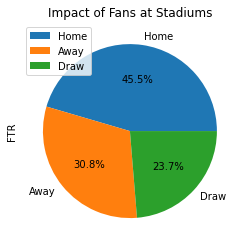

In [6]:
pd.DataFrame(matches_with_fans).plot(kind='pie', subplots=True, labels=['Home', 'Away', 'Draw'],autopct='%1.1f%%')
plt.title(label='Impact of Fans at Stadiums')
plt.legend(loc='upper left')
plt.show()

## Impact of having no fans at Stadiums

> The below pie chart confirms that once fans were not allowed into stadiums during the covid pandemic era, the concept of home advantage was virtually wiped away. Both the home team and away team won just above 38% of games played without fans with just over 22% of the games ending in a draw.

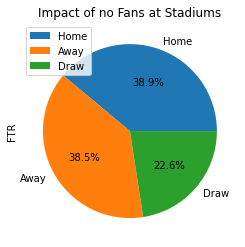

In [7]:
pd.DataFrame(matches_with_no_fans).plot(kind='pie', subplots=True, labels=['Home', 'Away', 'Draw'],autopct='%1.1f%%')
plt.title(label='Impact of no Fans at Stadiums')
plt.legend(loc='upper left')
plt.show()

## We now explore how some specific football teams  were impacted by having no fans at the stadium for their games during the covid era

## How Liverpool FC were impacted by the playing of matches with no fans at stadiums

> Liverpool FC were hugely impacted by having no fans at Anfield. We can see from the below plot that they won 100% of all matches played at a full Anfield while they only won just about 54% of games played at an empty Anfield.



In [43]:
home_matches_with_fans = epl_data[(epl_data['HomeTeam']=='Liverpool') & (epl_data['Attendance']=='Fans')][['Attendance', 'FTR']].value_counts()
home_matches_without_fans = epl_data[(epl_data['HomeTeam']=='Liverpool') & (epl_data['Attendance']!='Fans')][['Attendance', 'FTR']].value_counts()
print(home_matches_with_fans)
print(home_matches_without_fans)

Attendance  FTR
Fans        H      16
dtype: int64
Attendance  FTR
No Fans     H      12
            A       6
            D       4
dtype: int64


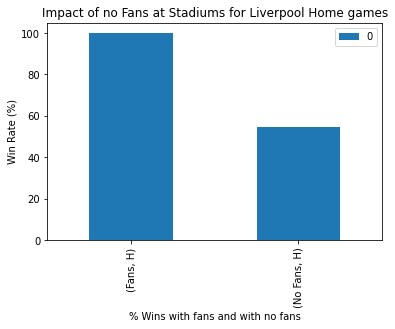

In [50]:
full_anfield = pd.DataFrame(home_matches_with_fans[np.in1d(home_matches_with_fans.index.get_level_values(1), ['H'])]/home_matches_with_fans.sum()*100)
empty_anfield = pd.DataFrame(home_matches_without_fans[np.in1d(home_matches_without_fans.index.get_level_values(1), ['H'])]/home_matches_without_fans.sum()*100)
pd.concat([full_anfield, empty_anfield]).plot(kind='bar')
plt.title(label='Impact of no Fans at Stadiums for Liverpool Home games')
plt.xlabel('% Wins with fans and with no fans')
plt.ylabel('Win Rate (%)')
plt.show()

## How Leeds United were impacted by the playing of matches with no fans at stadiums

> Leeds United were also hugely impacted by having no fans at Elland road. We can see that win rate for matches with fans at stadiums was exponentially higher than the win rate for matches played behind closed doors

In [52]:
home_matches_with_fans = epl_data[(epl_data['HomeTeam']=='Leeds') & (epl_data['Attendance']=='Fans')][['Attendance', 'FTR']].value_counts()
home_matches_without_fans = epl_data[(epl_data['HomeTeam']=='Leeds') & (epl_data['Attendance']!='Fans')][['Attendance', 'FTR']].value_counts()

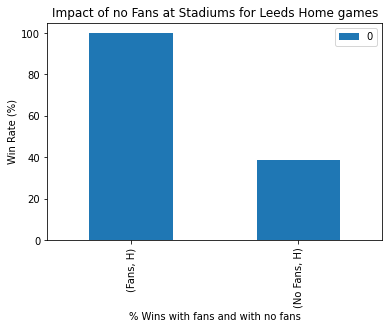

In [53]:
full_elland_road = pd.DataFrame(home_matches_with_fans[np.in1d(home_matches_with_fans.index.get_level_values(1), ['H'])]/home_matches_with_fans.sum()*100)
empty_elland_road = pd.DataFrame(home_matches_without_fans[np.in1d(home_matches_without_fans.index.get_level_values(1), ['H'])]/home_matches_without_fans.sum()*100)
pd.concat([full_elland_road, empty_elland_road]).plot(kind='bar')
plt.title(label='Impact of no Fans at Stadiums for Leeds Home games')
plt.xlabel('% Wins with fans and with no fans')
plt.ylabel('Win Rate (%)')
plt.show()

## How Newcastle United were impacted by the playing of matches with no fans at stadiums

> Newcastle United were also hugely impacted by having no fans at St. James' Park. Their win rate with fans at the stadium was pegged at 45% while they only won 25% of home matches without fans at the stadium.

In [54]:
home_matches_with_fans = epl_data[(epl_data['HomeTeam']=='Newcastle') & (epl_data['Attendance']=='Fans')][['Attendance', 'FTR']].value_counts()
home_matches_without_fans = epl_data[(epl_data['HomeTeam']=='Newcastle') & (epl_data['Attendance']!='Fans')][['Attendance', 'FTR']].value_counts()

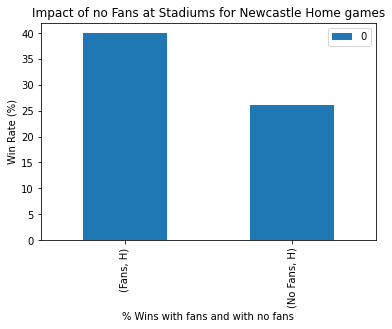

In [55]:
full_st_james = pd.DataFrame(home_matches_with_fans[np.in1d(home_matches_with_fans.index.get_level_values(1), ['H'])]/home_matches_with_fans.sum()*100)
empty_st_james = pd.DataFrame(home_matches_without_fans[np.in1d(home_matches_without_fans.index.get_level_values(1), ['H'])]/home_matches_without_fans.sum()*100)
pd.concat([full_st_james, empty_st_james]).plot(kind='bar')
plt.title(label='Impact of no Fans at Stadiums for Newcastle Home games')
plt.xlabel('% Wins with fans and with no fans')
plt.ylabel('Win Rate (%)')
plt.show()

## How Sheffield United were impacted by the playing of matches with no fans at stadiums

> Sheffield United were also hugely impacted by having no fans at Bramall Lane. Their win rate with fans at the stadium was pegged at 50% while they only won 30% of home matches without fans at the stadium.

In [56]:
home_matches_with_fans = epl_data[(epl_data['HomeTeam']=='Sheffield United') & (epl_data['Attendance']=='Fans')][['Attendance', 'FTR']].value_counts()
home_matches_without_fans = epl_data[(epl_data['HomeTeam']=='Sheffield United') & (epl_data['Attendance']!='Fans')][['Attendance', 'FTR']].value_counts()

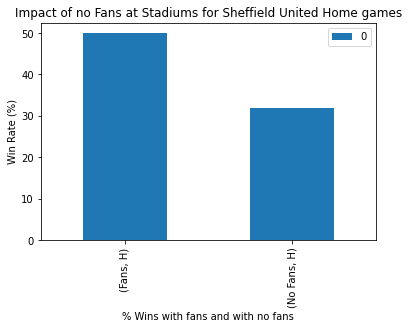

In [58]:
full_bramall_lane = pd.DataFrame(home_matches_with_fans[np.in1d(home_matches_with_fans.index.get_level_values(1), ['H'])]/home_matches_with_fans.sum()*100)
empty_bramall_lane = pd.DataFrame(home_matches_without_fans[np.in1d(home_matches_without_fans.index.get_level_values(1), ['H'])]/home_matches_without_fans.sum()*100)
pd.concat([full_bramall_lane, empty_bramall_lane]).plot(kind='bar')
plt.title(label='Impact of no Fans at Stadiums for Sheffield United Home games')
plt.xlabel('% Wins with fans and with no fans')
plt.ylabel('Win Rate (%)')
plt.show()

## Beyond exploring how no fans at stadiums affected the home team , we also wanted to explore how away teams were impacted by not having to deal with the pressure of the home fans. We decided to use Manchester United as a test case. Manchester United were chosen because the current iteration of the team seems to wilt under the slightest bit of pressure

## How Manchester United away games were affected by the playing of matches with no fans at stadiums

> Exploring how Manchester United fared at away games without fans at the stadium, it becomes clear that they were helped a lot by having no fans at the stadium. They won about 60% of away games without fans at the stadium compared to just 30% with fans at the stadium. 



In [59]:
away_matches_with_fans = epl_data[(epl_data['AwayTeam']=='Man United') & (epl_data['Attendance']=='Fans')][['Attendance', 'FTR']].value_counts()
away_matches_without_fans = epl_data[(epl_data['AwayTeam']=='Man United') & (epl_data['Attendance']!='Fans')][['Attendance', 'FTR']].value_counts()

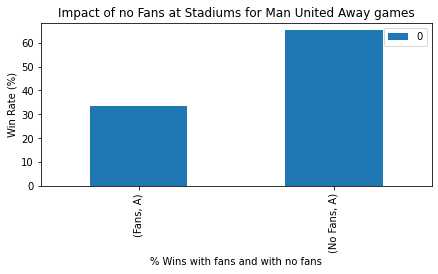

In [69]:
man_united_away_fans = pd.DataFrame(away_matches_with_fans[np.in1d(away_matches_with_fans.index.get_level_values(1), ['A'])]/away_matches_with_fans.sum()*100)
man_united_away_no_fans = pd.DataFrame(away_matches_without_fans[np.in1d(away_matches_without_fans.index.get_level_values(1), ['A'])]/away_matches_without_fans.sum()*100)
pd.concat([man_united_away_fans, man_united_away_no_fans]).plot(kind='bar',figsize=(7,3))
plt.title(label='Impact of no Fans at Stadiums for Man United Away games')
plt.xlabel('% Wins with fans and with no fans')
plt.ylabel('Win Rate (%)')
plt.legend()
plt.show()


>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert EPL_Data_Explanatory_Part_2.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 